### Import basic libraries

In [34]:
import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML

[nltk_data] Downloading package stopwords to /Users/jitu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data = pd.read_csv('latest_ticket_data.csv')
data.head(5)

Description    Category
0  hi since recruiter lead permission approve req...  CatetgoryD
1  re expire days hi ask help update passwords co...  CatetgoryD
2  verification warning hi has got attached pleas...  CatetgoryD
3  please dear looks blacklisted receiving mails ...  CatetgoryD
4  dear modules report report cost thank much reg...  CatetgoryD

### Encoding

In [23]:
data.drop('Category', axis = 1, inplace=True)

In [24]:
data.head()

Description  target
0  hi since recruiter lead permission approve req...       4
1  re expire days hi ask help update passwords co...       4
2  verification warning hi has got attached pleas...       4
3  please dear looks blacklisted receiving mails ...       4
4  dear modules report report cost thank much reg...       4

In [25]:
x = data['Description']
y = data['target']
from sklearn.model_selection import train_test_split  

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


### Vectorizing the ticket description and applyinf tfidf

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))  
X_1 = vectorizer.fit_transform(x_train)


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()

X_tfidf = tfidfconverter.fit_transform(X_1)

### Using MultinomialNB for classification(Use any model LSTM/RNN )

In [29]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(X_tfidf, y_train)

In [30]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])

text_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me',...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [32]:
from sklearn.metrics import accuracy_score

pred = text_clf.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.9216666666666666

In [35]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

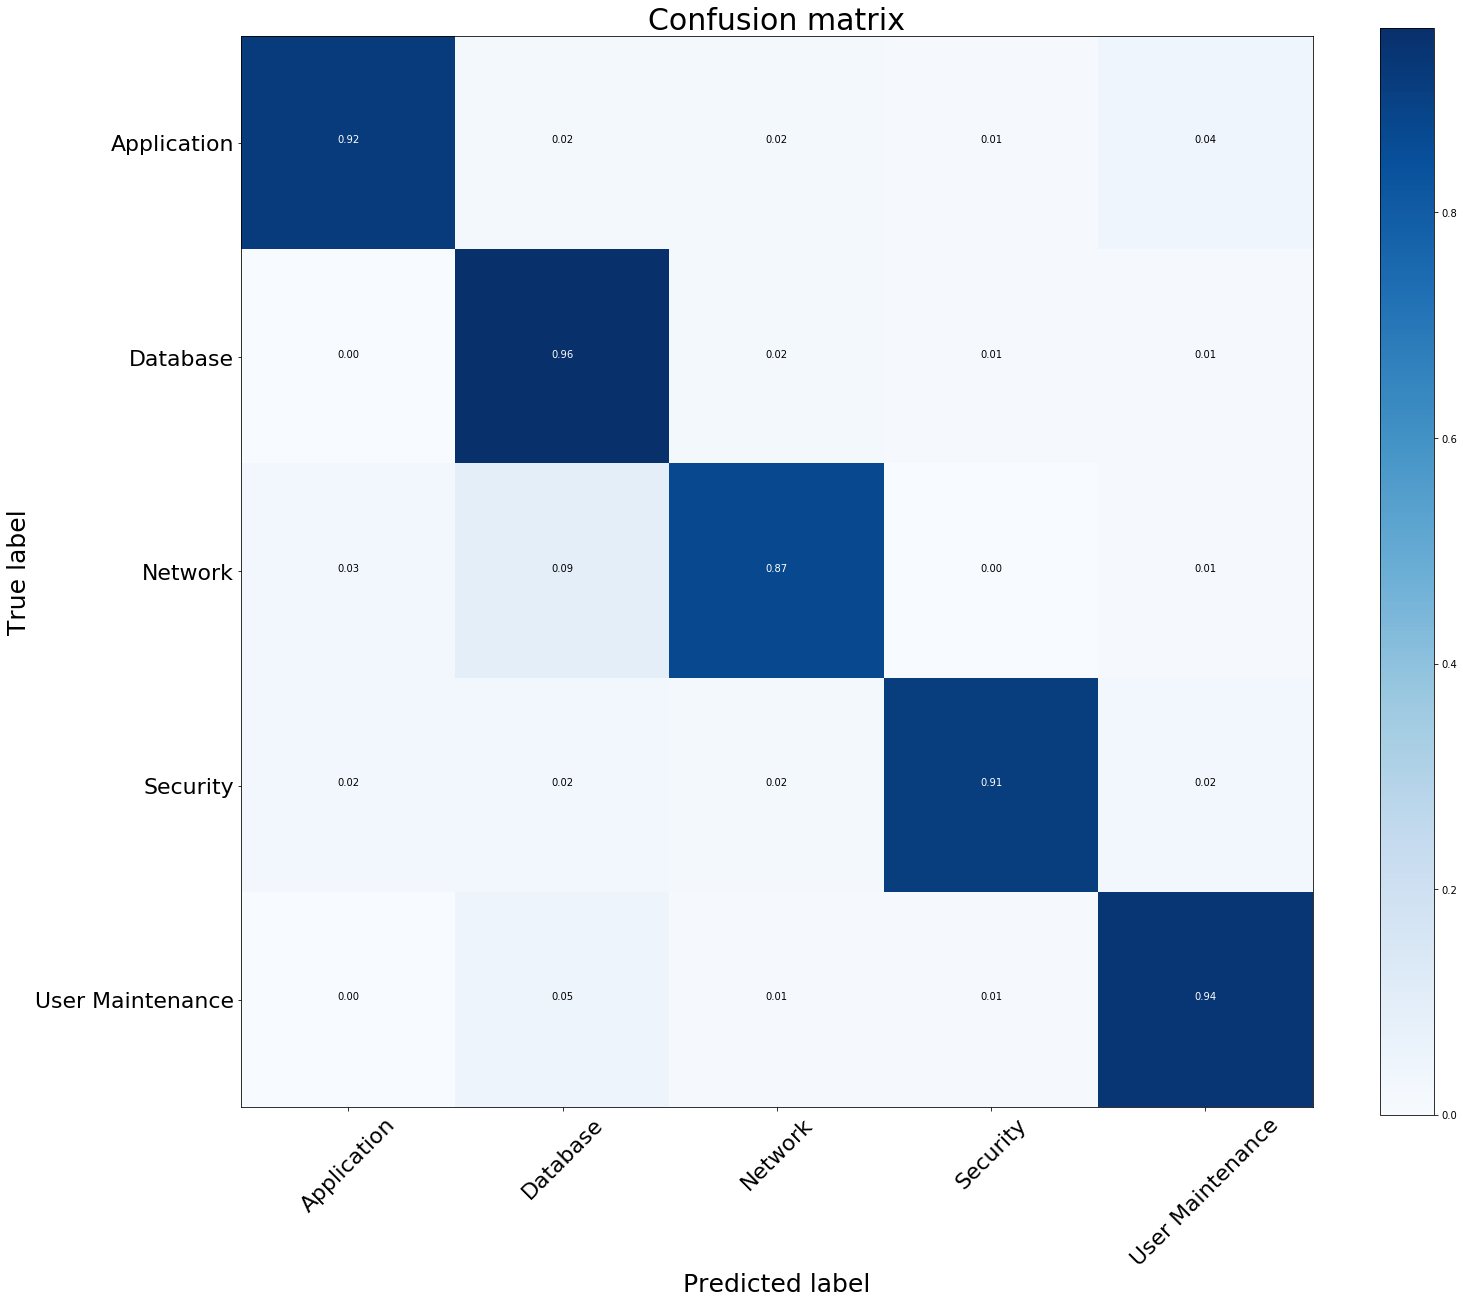

In [37]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools

encoder = LabelEncoder()
encoder.fit(['Application', 'Database', 'Network', 'Security', 'User Maintenance'])
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [ ]:
### Saving the classifier to a pickel

In [109]:
from sklearn.externals import joblib

joblib.dump(text_clf, 'classifier.pkl')

['text_classifier.pkl']